# Support Vector Machine

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

In [3]:
from sklearn.datasets.samples_generator import make_blobs

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
X, Y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=.6)

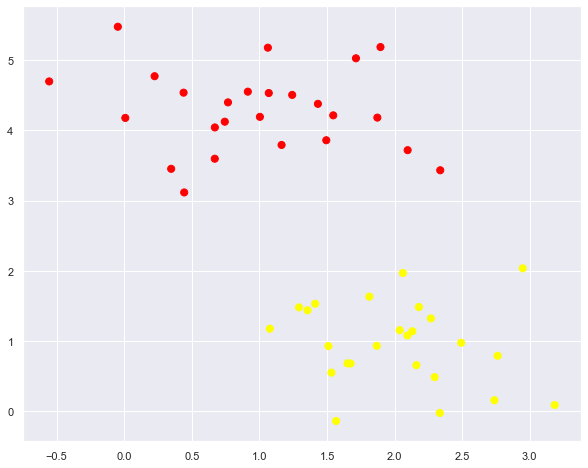

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.show()

# El problema de la separación
* Alternativa: Usar SVM, recuerda que este MAX el width del street

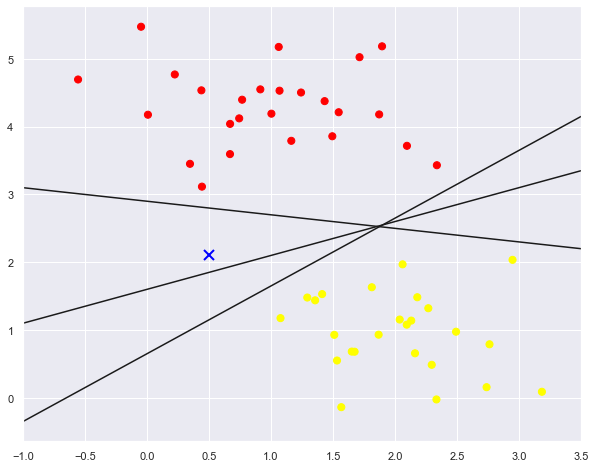

In [7]:
plt.figure(figsize=(10,8))
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([.5],[2.1],'x',color="blue",markeredgewidth=2,markersize=10)

for a,b in [(1,.65),(.5,1.6),(-.2,2.9)]:
    yy=a*xx+b
    plt.plot(xx,yy,"-k")
plt.xlim(-1,3.5)
plt.show()

## Maximizar el margen

* $d$: Distancia hasta encontrarnos con el punto próximo (support vector), básicamente es la perpendicular a cada recta y calcular la distancia a cada punto, también llamado la <strong>proyección ortogonal</strong>

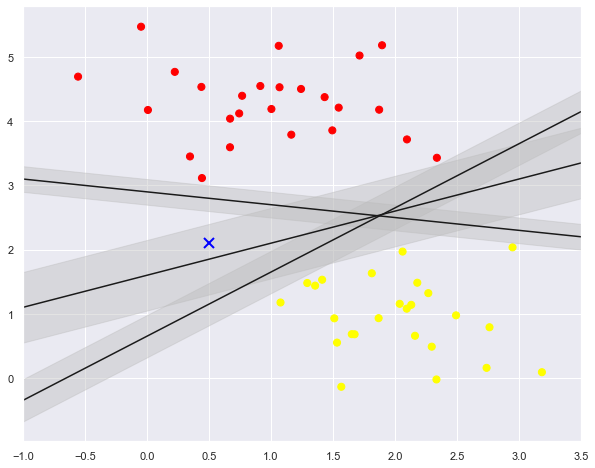

In [9]:
plt.figure(figsize=(10,8))
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([.5],[2.1],'x',color="blue",markeredgewidth=2,markersize=10)

# (x1,x2,w)
for a,b,d in [(1,.65,.33),(.5,1.6,.55),(-.2,2.9,.2)]:
    yy=a*xx+b
    plt.plot(xx,yy,"-k")
    plt.fill_between(xx,yy-d,yy+d,edgecolor="none",color="#BBBBBB",alpha=.4)
plt.xlim(-1,3.5)
plt.show()

In [22]:
X[(X[:,0]>2.)&(X[:,1]>3.)], Y[(X[:,0]>2.)&(X[:,1]>3.)]

(array([[2.33812285, 3.43116792],
        [2.09680487, 3.7174206 ]]),
 array([0, 0]))

In [34]:
px, py = 2.33812285, 3.43116792
p = np.array([[px,py]])
p

array([[2.33812285, 3.43116792]])

In [25]:
w, b, d = .5,1.6,.55

In [35]:
n = np.array([[1,w]])
print(n.shape, n.T.shape)

(1, 2) (2, 1)


In [33]:
n

array([[1. , 0.5]])

In [32]:
n.T

array([[1. ],
       [0.5]])

In [38]:
np.dot(n.T,p)-b

array([[ 0.73812285,  1.83116792],
       [-0.43093858,  0.11558396]])

In [39]:
1*py + -w*px - b

0.6621064950000002

# Creación del modelo SVM

In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC(kernel="linear",C=1E10)
model.fit(X,Y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
def plot_svc(model, ax=None, plot_support=True):
    """Plot de la funcion de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca() # crea un plot de matplotlib
    xlim, ylim = ax.get_xlim(), ax.get_ylim() # obtiene los limites
    ## Generamos parrilla de ptos para evaluar el modelo
    # Genera 30 pts ordenados desde lim inf a lim supe
    xx = np.linspace(xlim[0],xlim[1],30)
    yy = np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(xx,yy) # matriz 30 x 30 para X e Y
    
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P,colors="k",levels=[-1,0,1],alpha=.5,linestyles=["--","-","--"])
    
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors="black")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


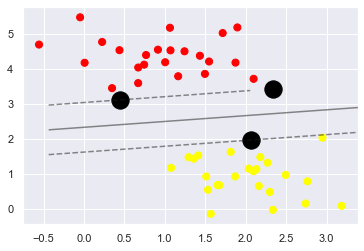

In [28]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plot_svc(model)

In [29]:
def plot_svm(N=10,ax=None):
    X, Y = make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=.6)
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear",C=1E10)
    model.fit(X,Y)
    
    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc(model,ax)

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


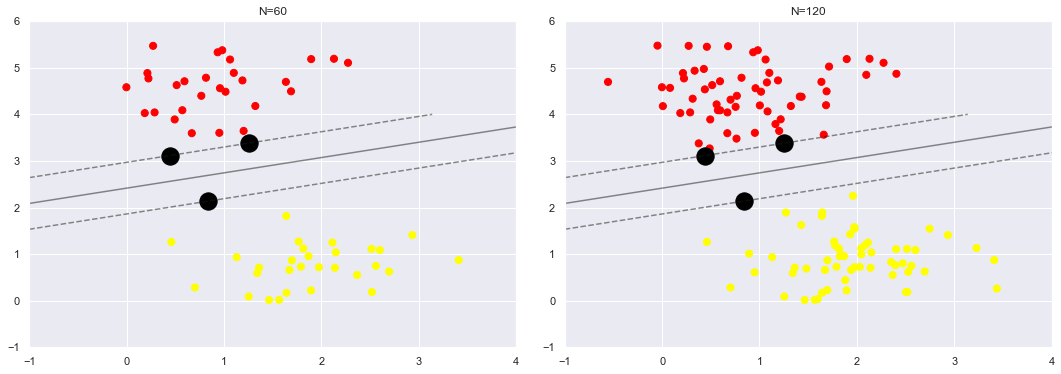

In [30]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=.0625,right=.95,wspace=.1)
for ax_i, N in zip(ax, [60,120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

In [31]:
from ipywidgets import interact, fixed

In [32]:
interact(plot_svm, N=[10,200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>